In [1]:
from __future__ import annotations
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Ensure local src/ on sys.path when run as a script
_HERE = Path("transmission_parametric_sinw").resolve().parent
_SRC = _HERE.parent.parent  # .../src

if str(_SRC) not in sys.path:
    sys.path.insert(0, str(_SRC))

from hamiltonian import Hamiltonian
from hamiltonian.base.block_tridiagonalization import split_into_subblocks_optimized
from negf.self_energy.surface import LeadSelfEnergy
from negf.gf.recursive_greens_functions import recursive_gf
from negf.self_energy import greens_functions
from hamiltonian.tb.orbitals import Orbitals
    

In [ ]:

Orbitals.orbital_sets = {"Si": "SiliconSP3D5S", "H": "HydrogenS"}
# Parametric nanowire gene
#rator parameters
a_si = 5.50
hamiltonian = Hamiltonian(nx=1, ny=1, nz=2, a=a_si, periodic_dirs='xy', passivate_x=True, nn_distance=2.4, transport_dir=[1,0,0])
hamiltonian.initialize()


a_si = 5.50
primitive_cell = [[a_si, 0,0 ],[0,a_si,0 ]]
hamiltonian.set_periodic_bc(primitive_cell)

In [12]:
hl, h0, hr = hamiltonian.get_hamiltonians()

In [13]:
h0

array([[0.9998+0.j, 0.    +0.j, 0.    +0.j, ..., 0.    +0.j, 0.    +0.j,
        0.    +0.j],
       [0.    +0.j, 0.9998+0.j, 0.    +0.j, ..., 0.    +0.j, 0.    +0.j,
        0.    +0.j],
       [0.    +0.j, 0.    +0.j, 0.9998+0.j, ..., 0.    +0.j, 0.    +0.j,
        0.    +0.j],
       ...,
       [0.    +0.j, 0.    +0.j, 0.    +0.j, ..., 0.9998+0.j, 0.    +0.j,
        0.    +0.j],
       [0.    +0.j, 0.    +0.j, 0.    +0.j, ..., 0.    +0.j, 0.9998+0.j,
        0.    +0.j],
       [0.    +0.j, 0.    +0.j, 0.    +0.j, ..., 0.    +0.j, 0.    +0.j,
        0.9998+0.j]], shape=(634, 634))

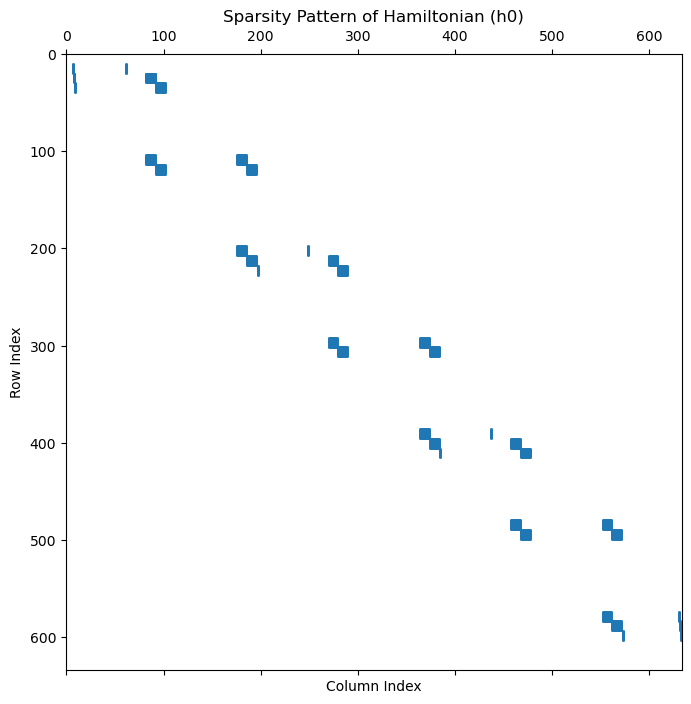

In [17]:
# Visualize the structure (sparsity pattern) of the hamiltonian matrix h0
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.spy(hr, markersize=1)
plt.title("Sparsity Pattern of Hamiltonian (h0)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()